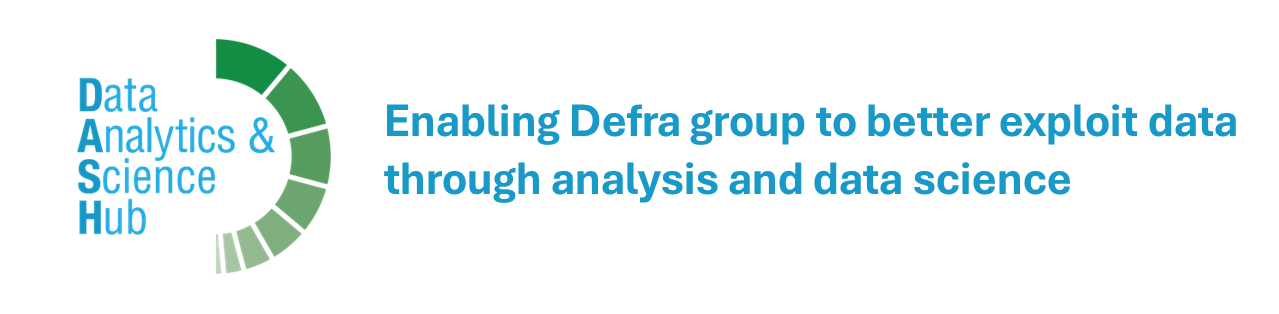

## **Data Analytics & Science Hub** 
### **VS Code in Posit Workbench**

## **Learning Objectives**

- How to link VS Code with GitHub.
- How to manage python packages and dependencies using Pixi
- How to pull data in Jupyter Notebooks from the DASH datalake.
- How to connect to Databricks clusters

## **What is Posit Workbench?**

- Posit Workbench is a cloud computing platform which brings together many popular Integrated Development Environments (IDEs)
- Microsoft Virtual Studio Code (VS Code) is one such popular IDE available on Posit Workbench

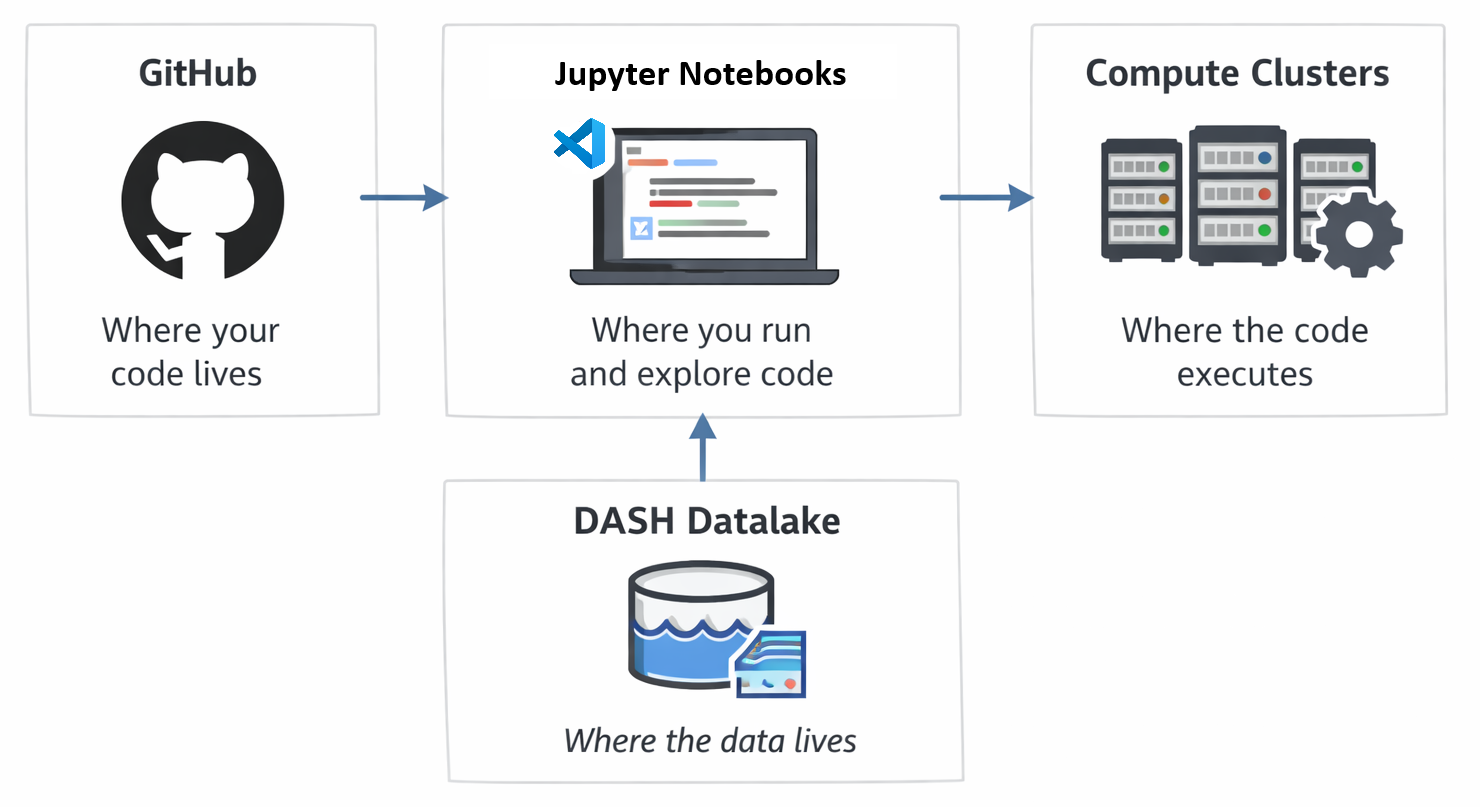

## **Why use VS Code on Posit Workbench?**

- Whilst Python users may also use Databricks as their development platform of choice, VS Code has an intuative, easy-to-use interface
- Working with the terminal to manage packages and dependencies is easy on VS Code 
- VS Code also offers extensions and CLI tools not available in Databricks such as Quarto, Pixi, Conda, uv, etc.

## **Getting started on Posit Workbench**

- Firstly, we need to sign into Posit Workbench [here](https://dash-workbench-prd.azure.defra.cloud/)
- Sign in using your DEFRA credentials

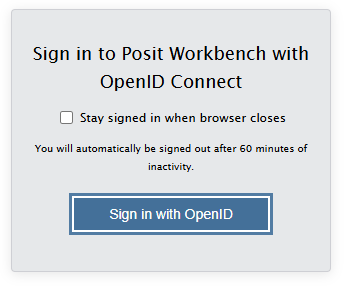

- Now we need to create our VS Code session
- To do this, click on **```New Session```** (either button will work)

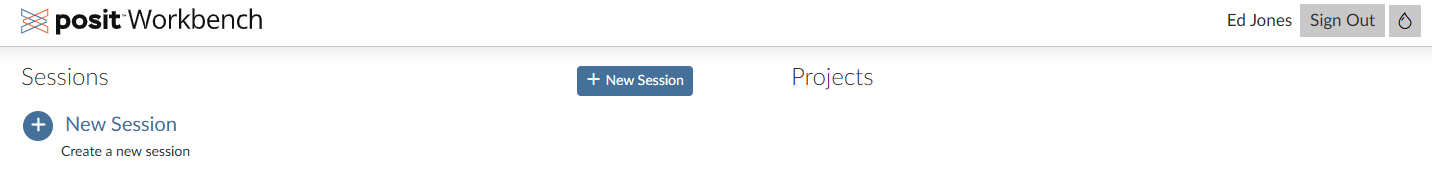

- Make sure at the top of the popup you have **```VS Code```** selected
- Then, click the downward arrow on the right hand side of the popup and select **```PRDDAPINFDB2416```**
- Ensure that there is a tick on the left of the popup window under **```Session Credentials```**. If not, click the empty circle. A tick should appear shortly after

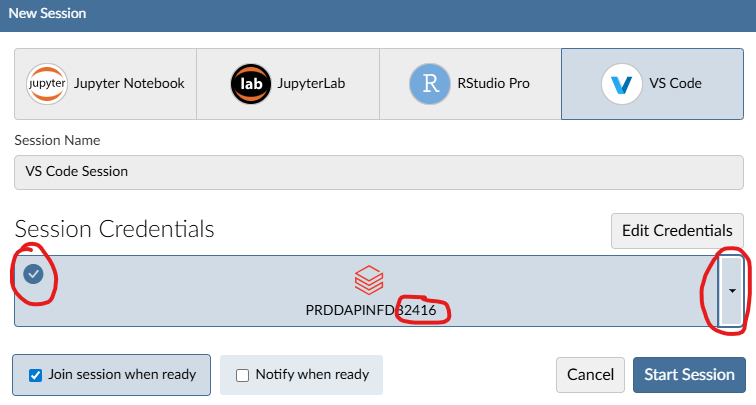

- Click **```Start Session```** and wait until the session becomes active

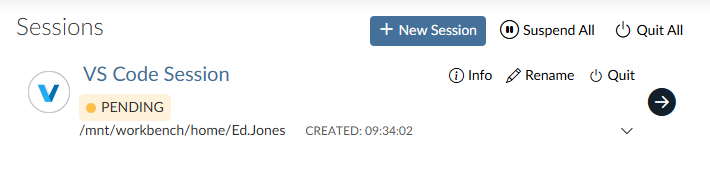
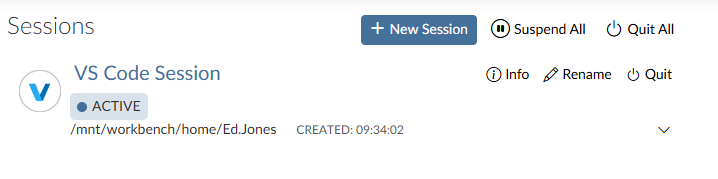

- We should now see the **```Getting Started```** page
- Close this tab (the tab within VS Code, not our browser tab)
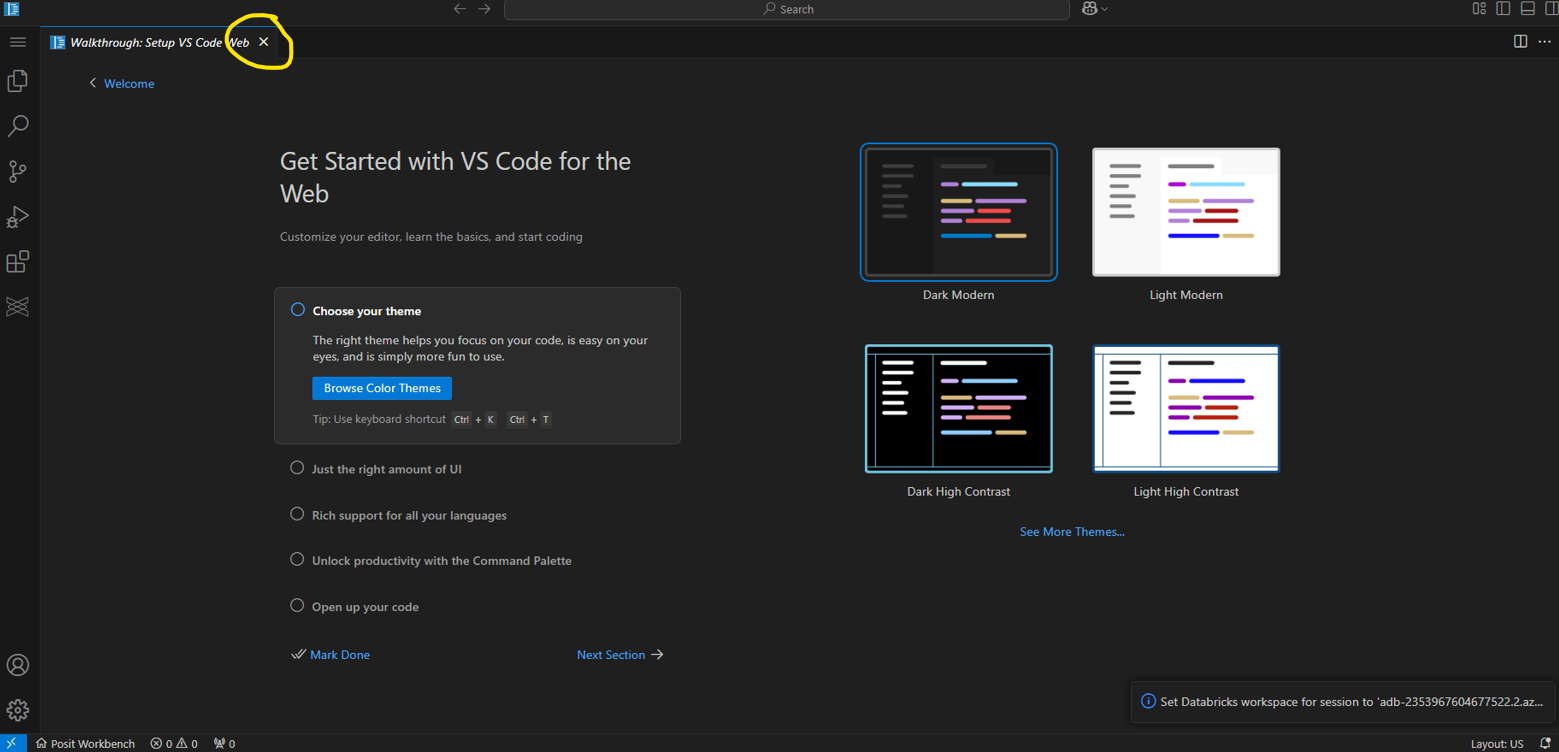



## **Using GitHub**

- Lets now import a Git repo into our VS Code session
- To do this, we nagivate to the **```Explorer```** on the left hand side (the button which looks like two sheets of paper), and click on **```Clone Repository```**
- **IMPORTANT: Only clone a repo if it is your first time using that repo. If you have already cloned it, choose ```Open Folder``` instead**

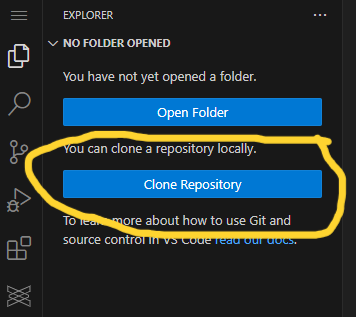

- Select **```Clone from GitHub```** from the popup at the top of the screen
- Click **```Allow```**

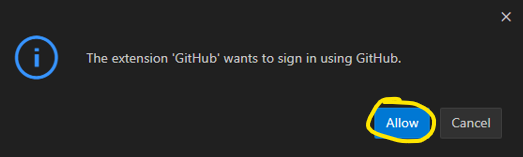


- Click **```Copy & Continue```**

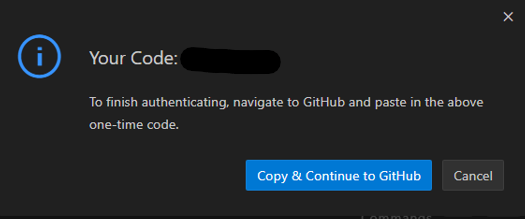

- Click **```Open```**

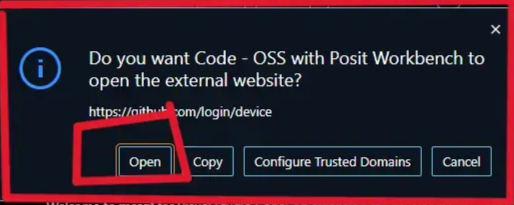

- Paste the 6-digit code in using **```Ctrl + V```** and click **```Continue```**
- Click **```Authorize```**

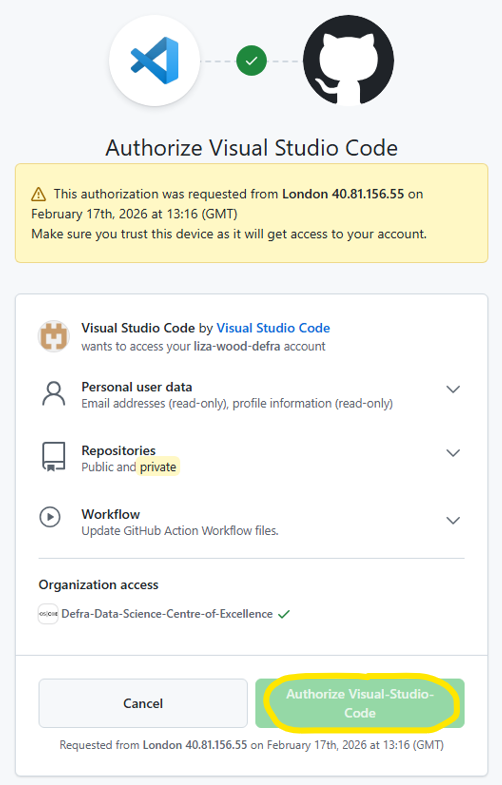

- Confirm access to GitHub using your password
- After authentication, close the GitHub browser tab and return to VS Code
- Paste the following address in the top bar in VS Code:

**```https://github.com/Defra-Data-Science-Centre-of-Excellence/DASH-Training-VSCode```**

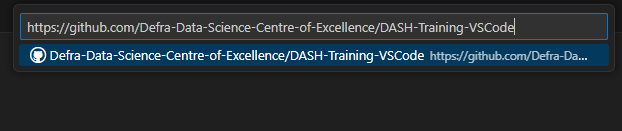

- Then set the repository destination 
- **IMPORTANT: Ensure that the destination is ```mnt/workbench/home/<YOUR.NAME>```**

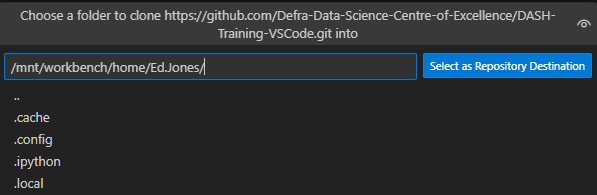

- Then we open the cloned repo

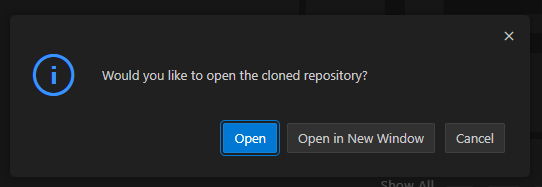

- Click **```Trust the authors```** for the folder you have just opened

**Using the terminal**
- By default, VS Code will now set the recently cloned repo as your current working directory. To check this, open a terminal with the shortcut **```Ctrl + Shift + '```**
- The current working directory can be seen in blue text



- For those who are more used to using the terminal to clone git repos, open a new terminal using **```Ctrl + Shift + '```** and check your current working directory with **```pwd```**
- Navigate to **```/mnt/workbench/home/<YOUR.NAME>```** and paste the following:

**```git clone https://github.com/Defra-Data-Science-Centre-of-Excellence/DASH-Training-VSCode.git/```**

- Any changes made to the repo are automatically tracked in the **```Source Control```** tab on the left

## **Python package management**

- Now that we have our repo cloned, we can start development
- In this tutorial we will be using Pixi as our python package manager. We use Pixi because:
    - Pixi keeps track of your packages for you. It automatically creates and updates a **```pixi.toml```** file whenever you install something, so you don’t have to manually maintain a requirements list
    - Pixi installs packages very fast. It installs packages much faster than typical Python tools
    - Pixi makes environments easy to recreate. It generates a lockfile with exact versions, so anyone can reproduce the same environment without running into version conflicts
- Further information on Pixi can be found [here](https://pixi.prefix.dev/latest/first_workspace/)

**Installation**
- To install Pixi, open your terminal using **```Ctrl + Shift + '```** and run:
```
curl -fsSL https://pixi.sh/install.sh | sh
```
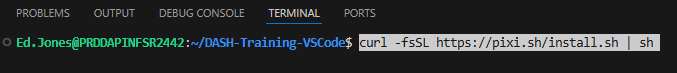

- Now lets ensure that Pixi is up to date by running:
**```pixi self-update```**

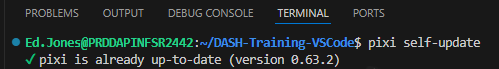

- Finally, we initiate our Pixi environment by running:
**```pixi init```**:

    - This will create some folders and files in your working directory. This is because unlike venv and conda which are global python environments, Pixi creates *localised* python environments
    - This means that Pixi will detect the **```pixi.toml```** file in your working directory and automatically load the dependencies listed in that file; no more having to activate!
    - As a result of this localised environment working style, please ensure that you are in the correct working directory by checking the blue text in your terminal before doing this

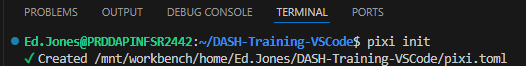
- Now we will add packages to our new Pixi environment
- We need to edit the **```pixi.toml```** file to do this, as databricks-connect must be installed as a pypi dependency, rather than a conda dependency which is the default for Pixi
- For this reason, it is easier not to use the command prompt
- Copy & paste the text below into your **```pixi.toml```** file
- **IMPORTANT: Do not include the backticks at the start and end of the text below - only the actual text**

```

[dependencies]
python = "3.11.*"
pip = "*"
ipykernel = ">=7.2.0,<8"
jupyter = ">=1.1.1,<2"
plotly = "*"

[pypi-dependencies]
databricks-connect = "==15.*"

```

- Here is what your pixi.toml file should now look like:

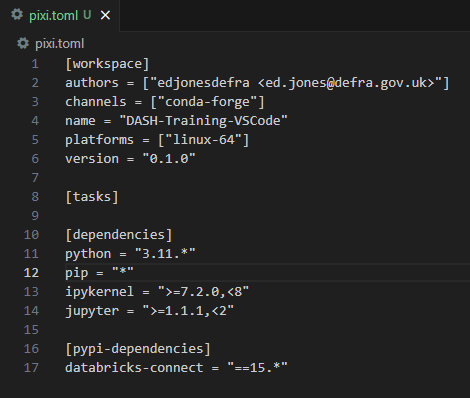

- Now, we run **```pixi install```** in the terminal

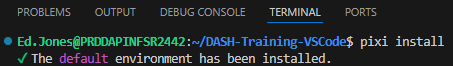

- And that's it! We now have a fully working Python environment via Pixi!
- We can view our dependencies by running **```pixi list```**

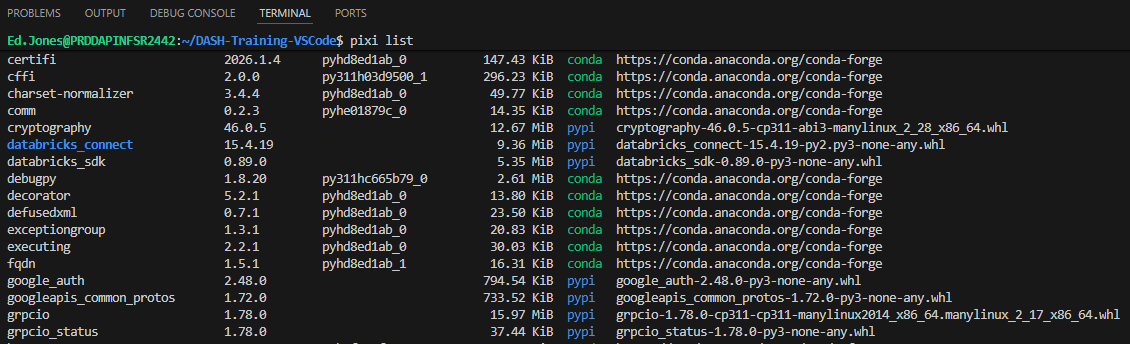

- Note how the dependecies are colour-coded so we can easily see which are installed from conda and which are installed from pypi
- We can also initialise our shell by running **```pixi shell```**

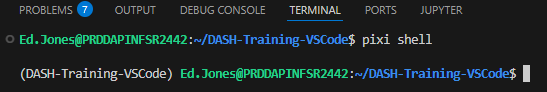

## **Running Jupyter Notebooks with Databricks**

- In the top right of this notebook you should see a button which says **```select kernel```**
- Click it, then select **```python environments```**
- Choose the python version in **```.pixi/envs/default/bin/python```** which should be **```Python 3.11.14```**
- We can now run the code below and import data in from Unity Catalog

In [ ]:
# Import required packages
import pandas as pd
from databricks.sdk import WorkspaceClient 
from io import BytesIO

# Set up workspace connection
w = WorkspaceClient()

# Read file from Unity Catalog volume
response = w.files.download("/Volumes/prd_dash_lab/lab/training_datasets/palmer_penguins/penguins.csv")

downloaded_file = response.contents.read()

# Read downloaded file to Pandas dataframe.
df = pd.read_csv(BytesIO(downloaded_file))

# Open file to upload
adelie = df[df['species'] == 'Adelie']

adelie.to_csv("/tmp/adelie.csv", index=False)

adelie.head(5)

In [ ]:
# Import visualisation package
import plotly.express as px

# Visualise the data
fig = px.histogram(
    adelie,
    x="island",
    color="sex",
    barmode="group"
)

fig.show()

- For instructions on how to write data into Unity Catalog, click [here](https://dash-connect-prd.azure.defra.cloud/DASH-Playbook/docs/workbench.html#working-with-data-in-vs-code)

- Now, lets look at configuring databricks clusters in VS Code:
- Open **```Settings```** in the bottom left
- Click on **```Remote [dash-workbench-prd.azure.defra.cloud]```**
- Search **```ssl```**
- Click on **```Proxy```** which can be found under **```Application```**
- Untick **```Http: Proxy Strict SSL```**

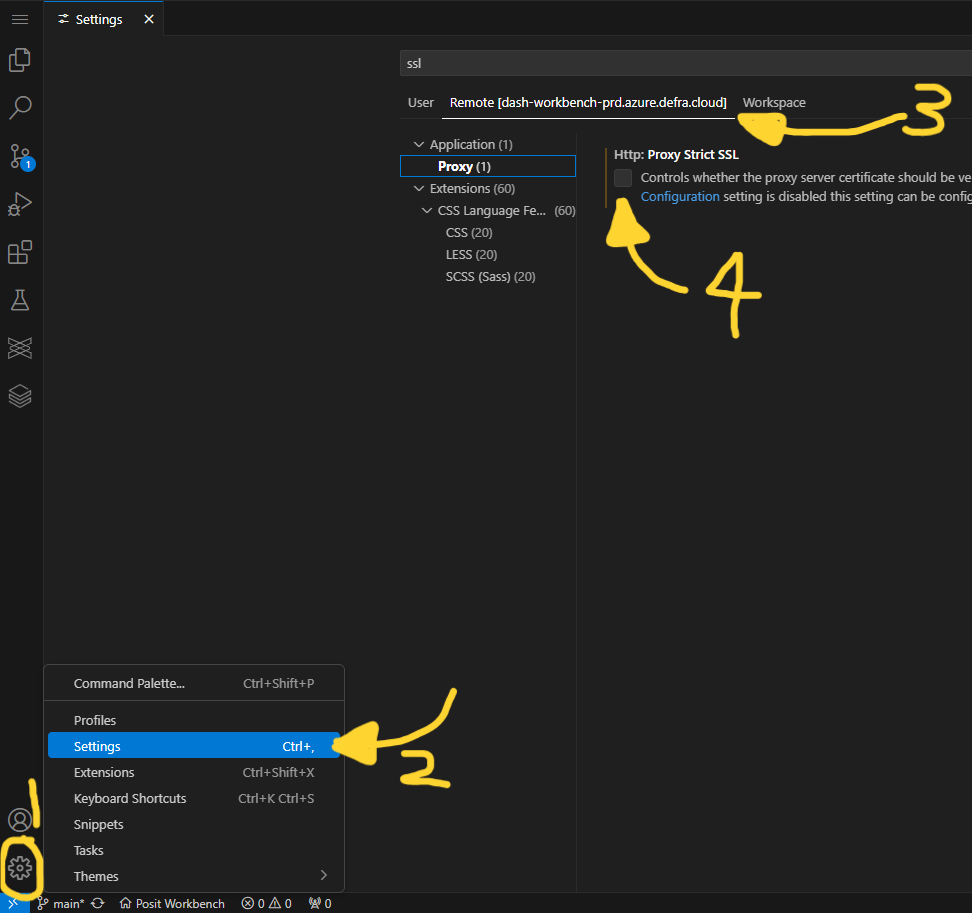

- Now click on the **```Extensions```** tab on the left and search for **```databricks```**
- Click **```Install```** on the top result
- A new tab will appear on the left

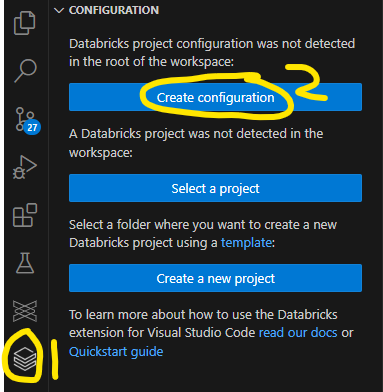

- Click on **```Profiles: workbench```**
- Click on **```Workbench```**
- After the extension has loaded, we should then be able to select a cluster

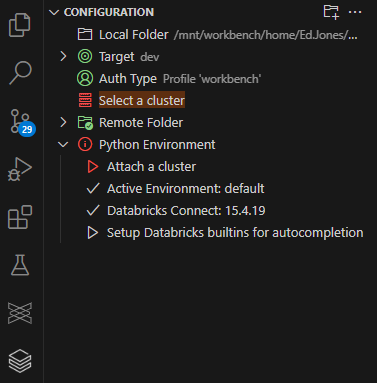

- Select **```RStudio_15.4LTSML```**
- **IMPORTANT: You may see a prompt in the bottom right to restart Jupyter. If you do, click ```Restart All Jupyter Kernels```**
- Our Python environment should already be configured as VS Code handles this automatically
- If we did not install **```databricks-connect```** in our Pixi environment then this will not automatically configure 
- In the top right, we should now be able to see a databricks button which allows us to run our entire notebook through the databricks cluster we have connected to

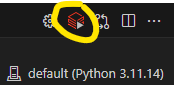

- Additionally, we can run **```.py```** files through this extension